In [1]:
import pandas as pd
import re
from sqlalchemy import create_engine
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline
import seaborn as sns
import random

In [2]:
engine = create_engine('sqlite:///:memory:', echo=False)
df = pd.read_excel(r'C:\Users\nnnn7\Documents\Data Analyst certificate\DataForTable2.1.xls')
df.to_sql('happy_report', con=engine, index=False, if_exists='replace')
df.head()

# Question 1: Israel's happiness score data through the years
query = 'SELECT * FROM "happy_report" WHERE "Country name" = "Israel" ORDER BY year DESC'
result = pd.read_sql(query, con=engine)
print (result)

   Country name  year  Life Ladder  Log GDP per capita  Social support  \
0        Israel  2023     6.783402           10.707269        0.951891   
1        Israel  2022     7.662397           10.698113        0.953653   
2        Israel  2021     7.577528           10.655128        0.916583   
3        Israel  2020     7.194928           10.588619        0.959072   
4        Israel  2019     7.331780           10.625004        0.946011   
5        Israel  2018     6.927179           10.603373        0.909595   
6        Israel  2017     7.331036           10.582742        0.916441   
7        Israel  2016     7.159011           10.560252        0.889661   
8        Israel  2015     7.079411           10.535632        0.864130   
9        Israel  2014     7.400570           10.530890        0.889070   
10       Israel  2013     7.320563           10.511643        0.908516   
11       Israel  2012     7.110855           10.487096        0.903416   
12       Israel  2011     7.433148    

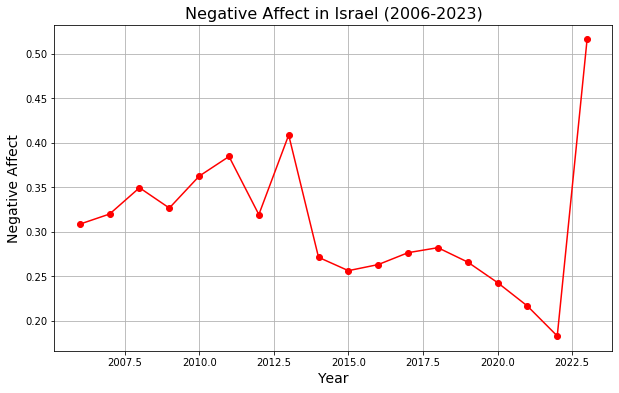

In [3]:
# Negative affect in Israel through the years 2006-2023
query = '''SELECT "year", "Negative affect" 
           FROM happy_report 
           WHERE "Country name" = 'Israel' 
           AND "year" BETWEEN 2006 AND 2023
           ORDER BY "year"'''
           
result = pd.read_sql(query, con=engine)
plt.figure(figsize=(10, 6))
plt.plot(result['year'], result['Negative affect'], marker='o', linestyle='-', color='r')
plt.title('Negative Affect in Israel (2006-2023)', fontsize=16)
plt.xlabel('Year', fontsize=14)
plt.ylabel('Negative Affect', fontsize=14)
plt.grid(True)

plt.show()

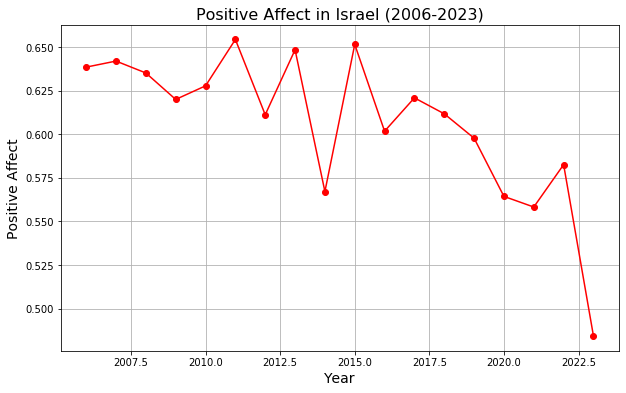

In [4]:
#Positive affect in Israel through the years 2006-2023
query = '''SELECT "year", "Positive affect" 
           FROM happy_report 
           WHERE "Country name" = 'Israel' 
           AND "year" BETWEEN 2006 AND 2023
           ORDER BY "year"'''
           
result = pd.read_sql(query, con=engine)
plt.figure(figsize=(10, 6))
plt.plot(result['year'], result['Positive affect'], marker='o', linestyle='-', color='r')
plt.title('Positive Affect in Israel (2006-2023)', fontsize=16)
plt.xlabel('Year', fontsize=14)
plt.ylabel('Positive Affect', fontsize=14)
plt.grid(True)

plt.show()

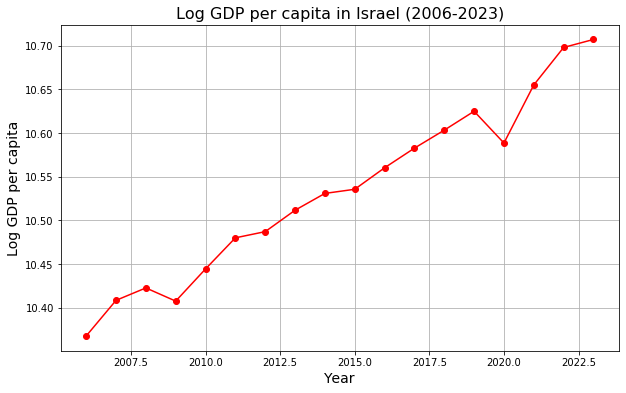

In [5]:
#log GDP per capita in Israel through the years 2006-2023
query = '''SELECT "year", "Log GDP per capita" 
           FROM happy_report 
           WHERE "Country name" = 'Israel' 
           AND "year" BETWEEN 2006 AND 2023
           ORDER BY "year"'''
           
result = pd.read_sql(query, con=engine)
plt.figure(figsize=(10, 6))
plt.plot(result['year'], result['Log GDP per capita'], marker='o', linestyle='-', color='r')
plt.title('Log GDP per capita in Israel (2006-2023)', fontsize=16)
plt.xlabel('Year', fontsize=14)
plt.ylabel('Log GDP per capita', fontsize=14)
plt.grid(True)

plt.show()

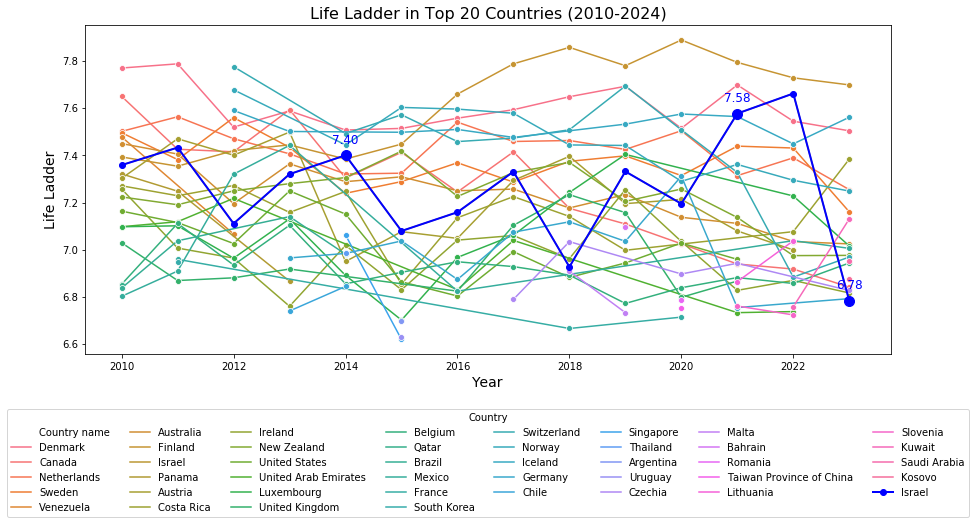

In [6]:
#Life Ladder in the top 20 countries through the years 2010-2024
query = '''
    SELECT "Country name", "year", "Life Ladder"
    FROM (
        SELECT 
            "Country name",
            "year",
            "Life Ladder",
            RANK() OVER (PARTITION BY "year" ORDER BY "Life Ladder" DESC) AS rank
        FROM happy_report
        WHERE year BETWEEN 2010 AND 2024
    ) AS ranked
    WHERE rank <= 21
    ORDER BY "year", rank
'''
top_20_life_ladder = pd.read_sql(query, con=engine)

israel_data = top_20_life_ladder[top_20_life_ladder['Country name'] == 'Israel']

highlight_years = [2014, 2021, 2023]
highlight_data = israel_data[israel_data['year'].isin(highlight_years)]

plt.figure(figsize=(14, 8))

sns.lineplot(data=top_20_life_ladder, x='year', y='Life Ladder', hue='Country name', 
             marker='o')

plt.plot(israel_data['year'], israel_data['Life Ladder'], marker='o', color='blue', 
         linewidth=2, label='Israel')

plt.scatter(highlight_data['year'], highlight_data['Life Ladder'], color='blue', 
            s=100, zorder=5)

for i, row in highlight_data.iterrows():
    plt.text(row['year'], row['Life Ladder'] + 0.05, f'{row["Life Ladder"]:.2f}', 
             color='blue', fontsize=12, ha='center')

plt.title('Life Ladder in Top 20 Countries (2010-2024)', fontsize=16)
plt.xlabel('Year', fontsize=14)
plt.ylabel('Life Ladder', fontsize=14)
plt.legend(title='Country', bbox_to_anchor=(0.5, -0.15), loc='upper center', ncol=8)

plt.tight_layout(rect=[0, 0, 1, 0.95])

plt.show()

In [7]:
country_colors = {}

# Function to generate a light color
def generate_light_color():
    return [random.uniform(0.6, 0.9) for _ in range(3)]

# Function to get color for a country and persist it
def get_country_color(country):
    if country not in country_colors:
        country_colors[country] = generate_light_color() if country != 'Israel' else 'blue'
    return country_colors[country]

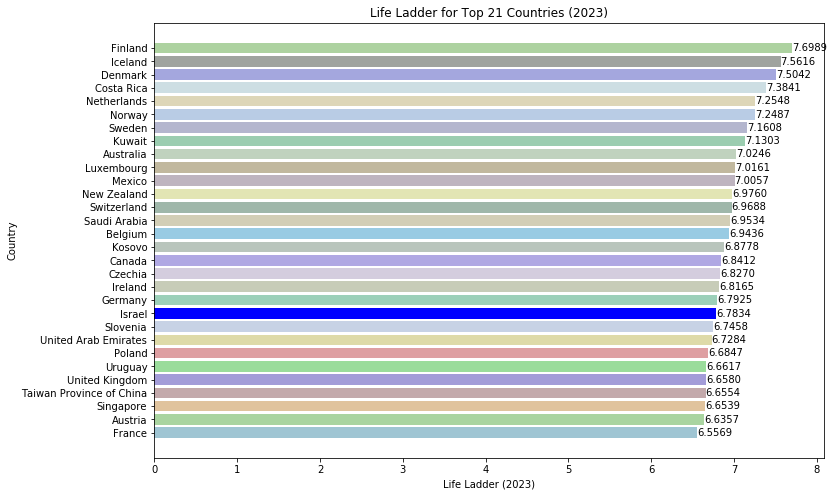

In [8]:
# Ranking in the World Happiness Report 2023
query = '''SELECT *
    FROM happy_report
    WHERE year = 2023
    ORDER BY "Life Ladder" DESC
    LIMIT 30
'''
result = pd.read_sql(query, con=engine)
result = result.sort_values(by="Life Ladder", ascending=False)

colors = [get_country_color(country) for country in result['Country name']]

plt.figure(figsize=(12, 8))
bars = plt.barh(result["Country name"], result["Life Ladder"], color=colors)

for bar in bars:
    plt.text(bar.get_width(), bar.get_y() + bar.get_height()/2, 
             f'{bar.get_width():.4f}', va='center', ha='left')

plt.xlabel('Life Ladder (2023)')
plt.ylabel('Country')
plt.title('Life Ladder for Top 21 Countries (2023)')
plt.gca().invert_yaxis()  
plt.show()

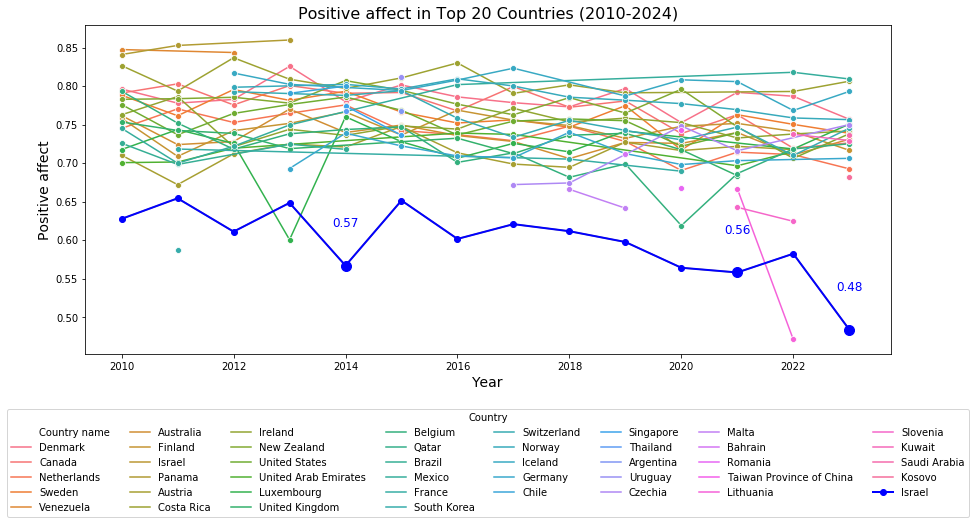

In [9]:
#Positive effect in the top 20 countries through the years 2010-2024
query = '''
    SELECT "Country name", "year", "Positive affect"
    FROM (
        SELECT 
            "Country name",
            "year",
            "Positive affect",
            RANK() OVER (PARTITION BY "year" ORDER BY "Life Ladder" DESC) AS rank
        FROM happy_report
        WHERE year BETWEEN 2010 AND 2024
    ) AS ranked
    WHERE rank <= 21
    ORDER BY "year", rank
'''
top_20_life_ladder = pd.read_sql(query, con=engine)

israel_data = top_20_life_ladder[top_20_life_ladder['Country name'] == 'Israel']

highlight_years = [2014, 2021, 2023]
highlight_data = israel_data[israel_data['year'].isin(highlight_years)]

plt.figure(figsize=(14, 8))

sns.lineplot(data=top_20_life_ladder, x='year', y='Positive affect', hue='Country name', 
             marker='o')

plt.plot(israel_data['year'], israel_data['Positive affect'], marker='o', color='blue', 
         linewidth=2, label='Israel')

plt.scatter(highlight_data['year'], highlight_data['Positive affect'], color='blue', 
            s=100, zorder=5)

for i, row in highlight_data.iterrows():
    plt.text(row['year'], row['Positive affect'] + 0.05, f'{row["Positive affect"]:.2f}', 
             color='blue', fontsize=12, ha='center')

plt.title('Positive affect in Top 20 Countries (2010-2024)', fontsize=16)
plt.xlabel('Year', fontsize=14)
plt.ylabel('Positive affect', fontsize=14)
plt.legend(title='Country', bbox_to_anchor=(0.5, -0.15), loc='upper center', ncol=8)
plt.tight_layout(rect=[0, 0, 1, 0.95])

plt.show()

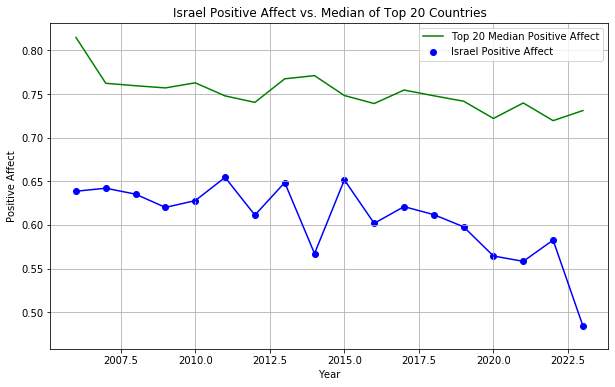

In [10]:
# Positive affect Israel vs median top 20 countries
query_top20 = '''
SELECT 
    year, 
    "Positive affect"
FROM 
    happy_report
WHERE 
    "Country name" IN (
        'Denmark', 'Canada', 'Netherlands', 'Sweden', 'Venezuela', 
        'Australia', 'Finland', 'Panama', 'Austria', 'Costa Rica', 
        'Ireland', 'New Zealand', 'United States', 'United Arab Emirates', 
        'Luxembourg', 'United Kingdom', 'Belgium', 'Qatar', 'Brazil', 'Mexico'
    )
ORDER BY 
    year, "Positive affect";
'''

query_israel = '''
SELECT 
    year, 
    "Positive affect" 
FROM 
    happy_report 
WHERE 
    "Country name" = 'Israel'
ORDER BY 
    year;
'''


df_top20 = pd.read_sql(query_top20, con=engine)
df_israel = pd.read_sql(query_israel, con=engine)


median_top20 = df_top20.groupby('year')['Positive affect'].median().reset_index()
df_merged = pd.merge(median_top20, df_israel, on='year', suffixes=('_Top20', '_Israel'))


plt.figure(figsize=(10, 6))


plt.scatter(df_merged['year'], df_merged['Positive affect_Israel'], color='blue', label='Israel Positive Affect')
plt.plot(df_merged['year'], df_merged['Positive affect_Israel'], linestyle='-', color='blue')
plt.plot(df_merged['year'], df_merged['Positive affect_Top20'], linestyle='-', color='green', label='Top 20 Median Positive Affect')


plt.xlabel('Year')
plt.ylabel('Positive Affect')
plt.title('Israel Positive Affect vs. Median of Top 20 Countries')
plt.legend()
plt.grid(True)
plt.show()


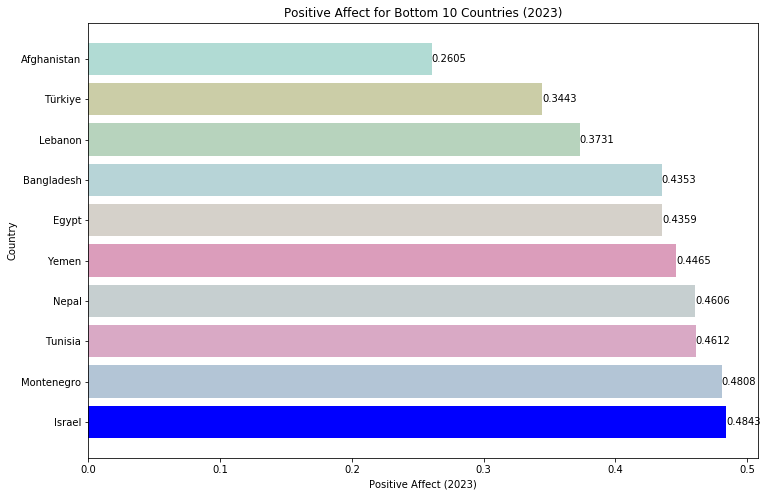

In [11]:
# Israel's rank in Positive Affect in 2023
query = '''
    SELECT "Country name", "year", "Positive affect"
    FROM happy_report
    WHERE "year" = 2023
    ORDER BY "Positive affect"
    LIMIT 10'''

read_query = pd.read_sql(query, con=engine)
result = read_query.sort_values(by="Positive affect", ascending=True)

colors = [get_country_color(country) for country in result['Country name']]

plt.figure(figsize=(12, 8))
bars = plt.barh(result["Country name"], result["Positive affect"], color=colors)

for bar in bars:
    plt.text(bar.get_width(), bar.get_y() + bar.get_height()/2, 
             f'{bar.get_width():.4f}', va='center', ha='left')

plt.xlabel('Positive Affect (2023)')
plt.ylabel('Country')
plt.title('Positive Affect for Bottom 10 Countries (2023)')
plt.gca().invert_yaxis()  
plt.show()

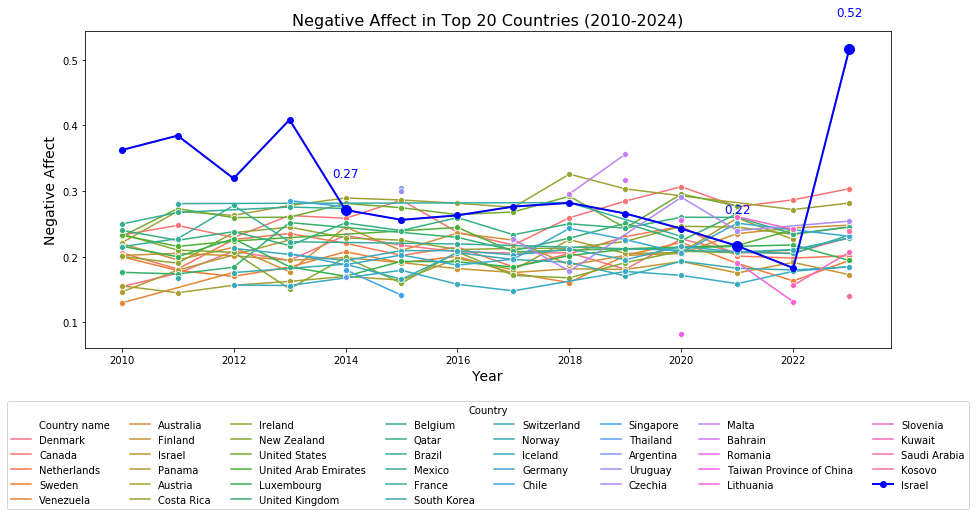

In [12]:
#Negative effect in the top 20 countries through the years 2010-2024
query = '''
    SELECT "Country name", "year", "Negative Affect"
    FROM (
        SELECT 
            "Country name",
            "year",
            "Negative Affect",
            RANK() OVER (PARTITION BY "year" ORDER BY "Life Ladder" DESC) AS rank
        FROM happy_report
        WHERE year BETWEEN 2010 AND 2024
    ) AS ranked
    WHERE rank <= 21
    ORDER BY "year", rank
'''
top_20_life_ladder = pd.read_sql(query, con=engine)

israel_data = top_20_life_ladder[top_20_life_ladder['Country name'] == 'Israel']

highlight_years = [2014, 2021, 2023]
highlight_data = israel_data[israel_data['year'].isin(highlight_years)]

plt.figure(figsize=(14, 8))

sns.lineplot(data=top_20_life_ladder, x='year', y='Negative Affect', hue='Country name', 
             marker='o')

plt.plot(israel_data['year'], israel_data['Negative Affect'], marker='o', color='blue', 
         linewidth=2, label='Israel')

plt.scatter(highlight_data['year'], highlight_data['Negative Affect'], color='blue', 
            s=100, zorder=5)

for i, row in highlight_data.iterrows():
    plt.text(row['year'], row['Negative Affect'] + 0.05, f'{row["Negative Affect"]:.2f}', 
             color='blue', fontsize=12, ha='center')

plt.title('Negative Affect in Top 20 Countries (2010-2024)', fontsize=16)
plt.xlabel('Year', fontsize=14)
plt.ylabel('Negative Affect', fontsize=14)
plt.legend(title='Country', bbox_to_anchor=(0.5, -0.15), loc='upper center', ncol=8)
plt.tight_layout(rect=[0, 0, 1, 0.95])

plt.show()

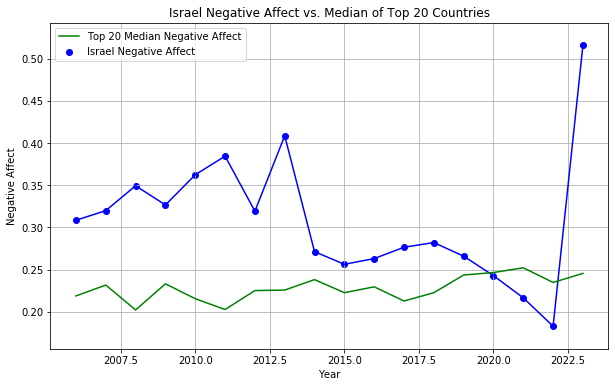

In [13]:
# Negative affect Israel vs median top 20 countries
query_top20 = '''
SELECT 
    year, 
    "Negative affect"
FROM 
    happy_report
WHERE 
    "Country name" IN (
        'Denmark', 'Canada', 'Netherlands', 'Sweden', 'Venezuela', 
        'Australia', 'Finland', 'Panama', 'Austria', 'Costa Rica', 
        'Ireland', 'New Zealand', 'United States', 'United Arab Emirates', 
        'Luxembourg', 'United Kingdom', 'Belgium', 'Qatar', 'Brazil', 'Mexico'
    )
ORDER BY 
    year, "Negative affect";
'''

query_israel = '''
SELECT 
    year, 
    "Negative affect" 
FROM 
    happy_report 
WHERE 
    "Country name" = 'Israel'
ORDER BY 
    year;
'''


df_top20 = pd.read_sql(query_top20, con=engine)
df_israel = pd.read_sql(query_israel, con=engine)


median_top20 = df_top20.groupby('year')['Negative affect'].median().reset_index()
df_merged = pd.merge(median_top20, df_israel, on='year', suffixes=('_Top20', '_Israel'))


plt.figure(figsize=(10, 6))


plt.scatter(df_merged['year'], df_merged['Negative affect_Israel'], color='blue', label='Israel Negative Affect')
plt.plot(df_merged['year'], df_merged['Negative affect_Israel'], linestyle='-', color='blue')
plt.plot(df_merged['year'], df_merged['Negative affect_Top20'], linestyle='-', color='green', label='Top 20 Median Negative Affect')


plt.xlabel('Year')
plt.ylabel('Negative Affect')
plt.title('Israel Negative Affect vs. Median of Top 20 Countries')
plt.legend()
plt.grid(True)
plt.show()


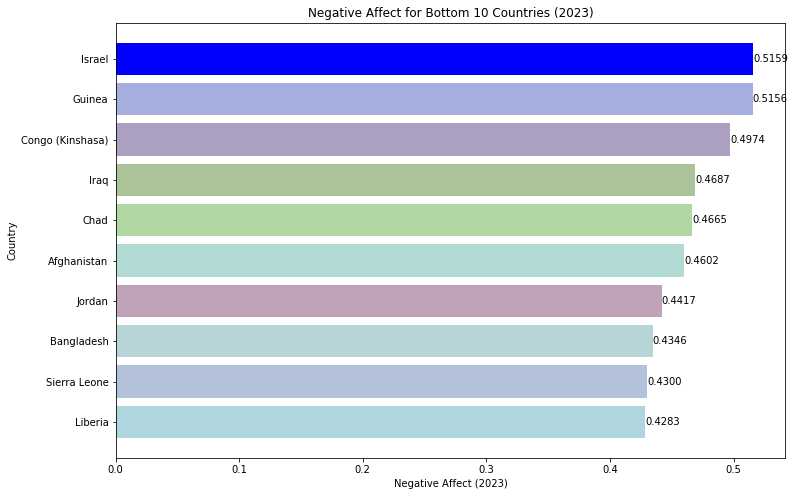

In [14]:
# Israel's rank in Negative Affect in 2023
query = '''
    SELECT "Country name", "year", "Negative affect"
    FROM happy_report
    WHERE "year" = 2023
    ORDER BY "Negative affect" DESC
    LIMIT 10'''

read_query = pd.read_sql(query, con=engine)
result = read_query.sort_values(by="Negative affect", ascending=False)

colors = [get_country_color(country) for country in result['Country name']]

plt.figure(figsize=(12, 8))
bars = plt.barh(result["Country name"], result["Negative affect"], color=colors)

for bar in bars:
    plt.text(bar.get_width(), bar.get_y() + bar.get_height()/2, 
             f'{bar.get_width():.4f}', va='center', ha='left')

plt.xlabel('Negative Affect (2023)')
plt.ylabel('Country')
plt.title('Negative Affect for Bottom 10 Countries (2023)')
plt.gca().invert_yaxis()  
plt.show()

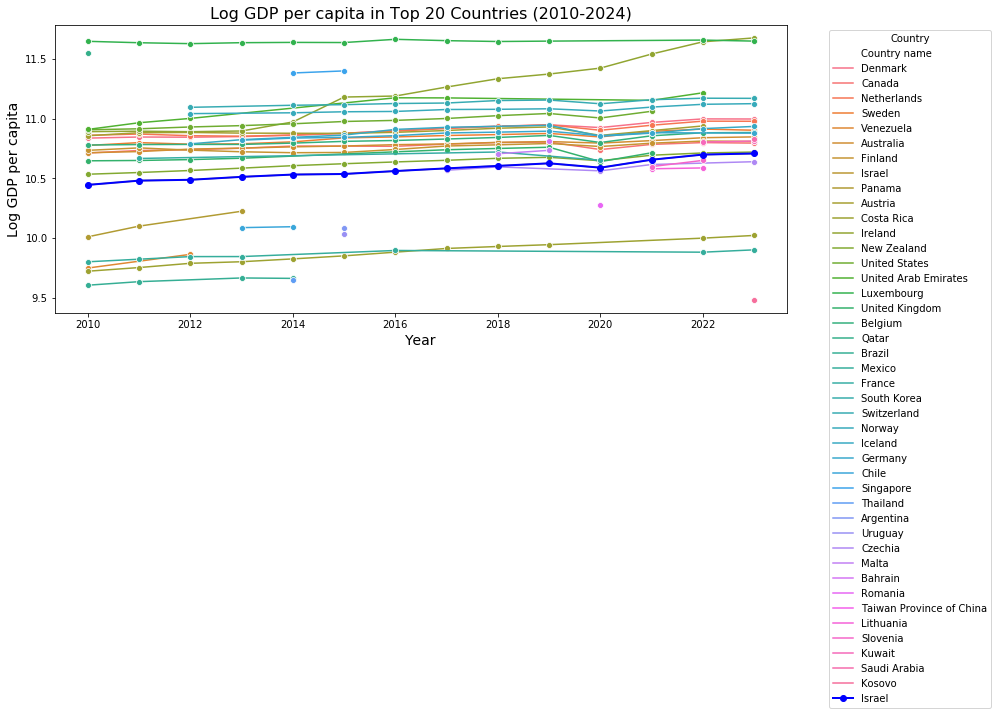

In [15]:
#Log GDP per capita in the top 20 countries through the years 2010-2024

query = '''
    SELECT "Country name", "year", "Log GDP per capita"
    FROM (
        SELECT 
            "Country name",
            "year",
            "Log GDP per capita",
            RANK() OVER (PARTITION BY "year" ORDER BY "Life Ladder" DESC) AS rank
        FROM happy_report
        WHERE year BETWEEN 2010 AND 2024
    ) AS ranked
    WHERE rank <= 21
    ORDER BY "year", rank
'''


top_20_gdp_per_capita = pd.read_sql(query, con=engine)


israel_data = top_20_gdp_per_capita[top_20_gdp_per_capita['Country name'] == 'Israel']

plt.figure(figsize=(14, 8))

sns.lineplot(data=top_20_gdp_per_capita, x='year', y='Log GDP per capita', hue='Country name', 
             marker = 'o' )
plt.plot(israel_data['year'], israel_data['Log GDP per capita'], marker='o', color='blue', 
         linewidth=2, label='Israel')

plt.title('Log GDP per capita in Top 20 Countries (2010-2024)', fontsize=16)
plt.xlabel('Year', fontsize=14)
plt.ylabel('Log GDP per capita', fontsize=14)
plt.legend(title='Country', bbox_to_anchor=(1.05, 1), loc='upper left')

plt.tight_layout()
plt.show()

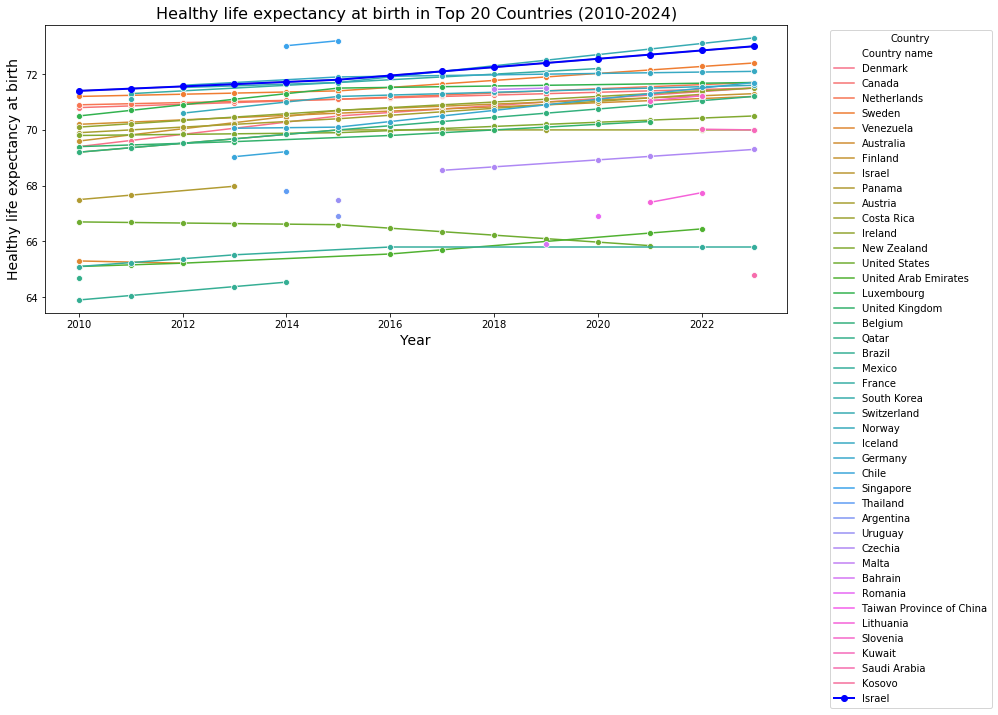

In [16]:
#Healthy life expectancy in the top 20 countries through the years 2010-2024

query = '''
    SELECT "Country name", "year", "Healthy life expectancy at birth"
    FROM (
        SELECT 
            "Country name",
            "year",
            "Healthy life expectancy at birth",
            RANK() OVER (PARTITION BY "year" ORDER BY "Life Ladder" DESC) AS rank
        FROM happy_report
        WHERE year BETWEEN 2010 AND 2024
    ) AS ranked
    WHERE rank <= 21
    ORDER BY "year", rank
'''


top_20_healthy_life = pd.read_sql(query, con=engine)


israel_data = top_20_healthy_life[top_20_healthy_life['Country name'] == 'Israel']

plt.figure(figsize=(14, 8))

sns.lineplot(data=top_20_healthy_life, x='year', y='Healthy life expectancy at birth', hue='Country name', 
             marker = 'o' )

plt.plot(israel_data['year'], israel_data['Healthy life expectancy at birth'], marker='o', color='blue', 
         linewidth=2, label='Israel')

plt.title('Healthy life expectancy at birth in Top 20 Countries (2010-2024)', fontsize=16)
plt.xlabel('Year', fontsize=14)
plt.ylabel('Healthy life expectancy at birth', fontsize=14)
plt.legend(title='Country', bbox_to_anchor=(1.05, 1), loc='upper left')

plt.tight_layout()
plt.show()

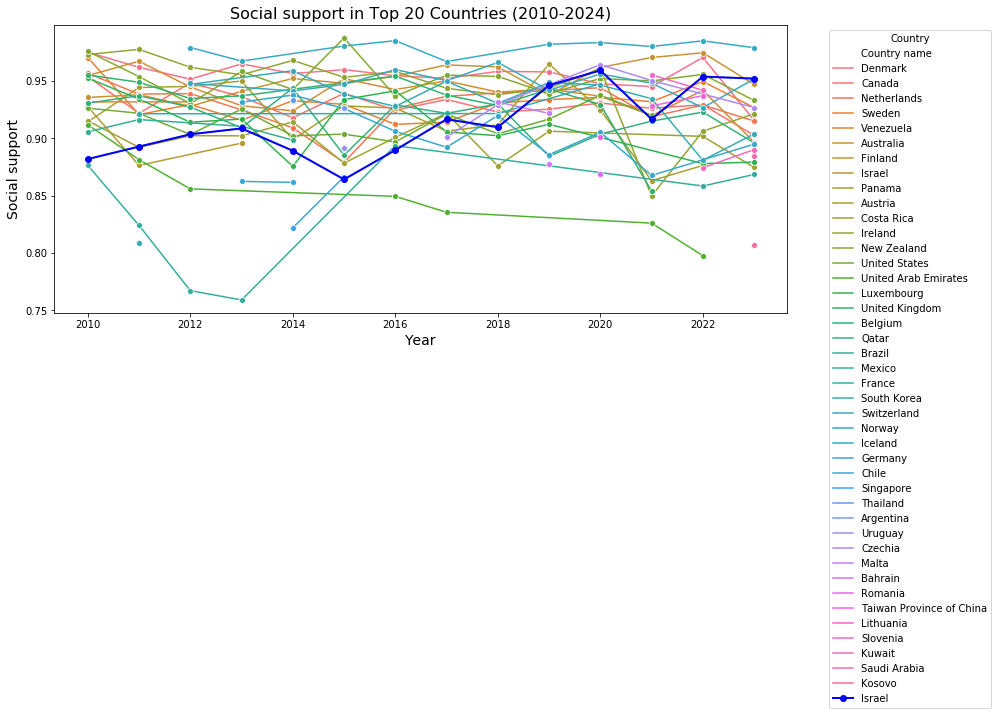

In [17]:
#Social Support in the top 20 countries through the years 2010-2024

query = '''
    SELECT "Country name", "year", "Social support"
    FROM (
        SELECT 
            "Country name",
            "year",
            "Social support",
            RANK() OVER (PARTITION BY "year" ORDER BY "Life Ladder" DESC) AS rank
        FROM happy_report
        WHERE year BETWEEN 2010 AND 2024
    ) AS ranked
    WHERE rank <= 21
    ORDER BY "year", rank
'''


top_20_social_support = pd.read_sql(query, con=engine)


israel_data = top_20_social_support[top_20_social_support['Country name'] == 'Israel']

plt.figure(figsize=(14, 8))

sns.lineplot(data=top_20_social_support, x='year', y='Social support', hue='Country name', 
             marker = 'o' )

plt.plot(israel_data['year'], israel_data['Social support'], marker='o', color='blue', 
         linewidth=2, label='Israel')

plt.title('Social support in Top 20 Countries (2010-2024)', fontsize=16)
plt.xlabel('Year', fontsize=14)
plt.ylabel('Social support', fontsize=14)
plt.legend(title='Country', bbox_to_anchor=(1.05, 1), loc='upper left')

plt.tight_layout()
plt.show()

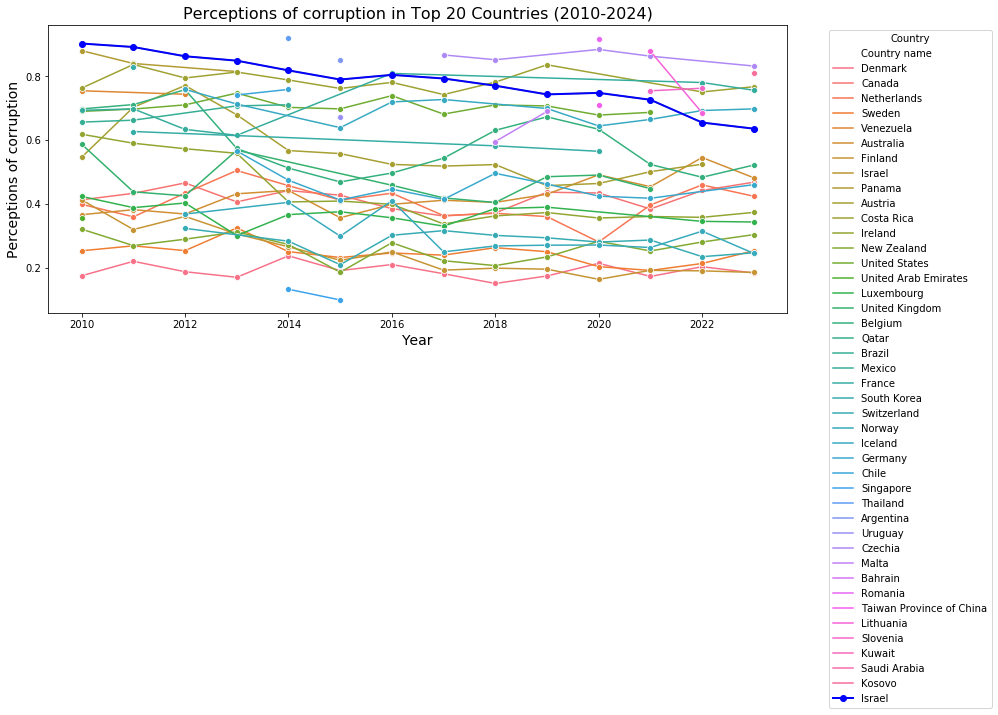

In [18]:
#Perceptions of corruption in the top 20 countries through the years 2010-2024

query = '''
    SELECT "Country name", "year", "Perceptions of corruption"
    FROM (
        SELECT 
            "Country name",
            "year",
            "Perceptions of corruption",
            RANK() OVER (PARTITION BY "year" ORDER BY "Life Ladder" DESC) AS rank
        FROM happy_report
        WHERE year BETWEEN 2010 AND 2024
    ) AS ranked
    WHERE rank <= 21
    ORDER BY "year", rank
'''


top_20_corruption = pd.read_sql(query, con=engine)


israel_data = top_20_corruption[top_20_corruption['Country name'] == 'Israel']

plt.figure(figsize=(14, 8))

sns.lineplot(data=top_20_corruption, x='year', y='Perceptions of corruption', hue='Country name', 
             marker = 'o' )

plt.plot(israel_data['year'], israel_data['Perceptions of corruption'], marker='o', color='blue', 
         linewidth=2, label='Israel')

plt.title('Perceptions of corruption in Top 20 Countries (2010-2024)', fontsize=16)
plt.xlabel('Year', fontsize=14)
plt.ylabel('Perceptions of corruption', fontsize=14)
plt.legend(title='Country', bbox_to_anchor=(1.05, 1), loc='upper left')

plt.tight_layout()
plt.show()

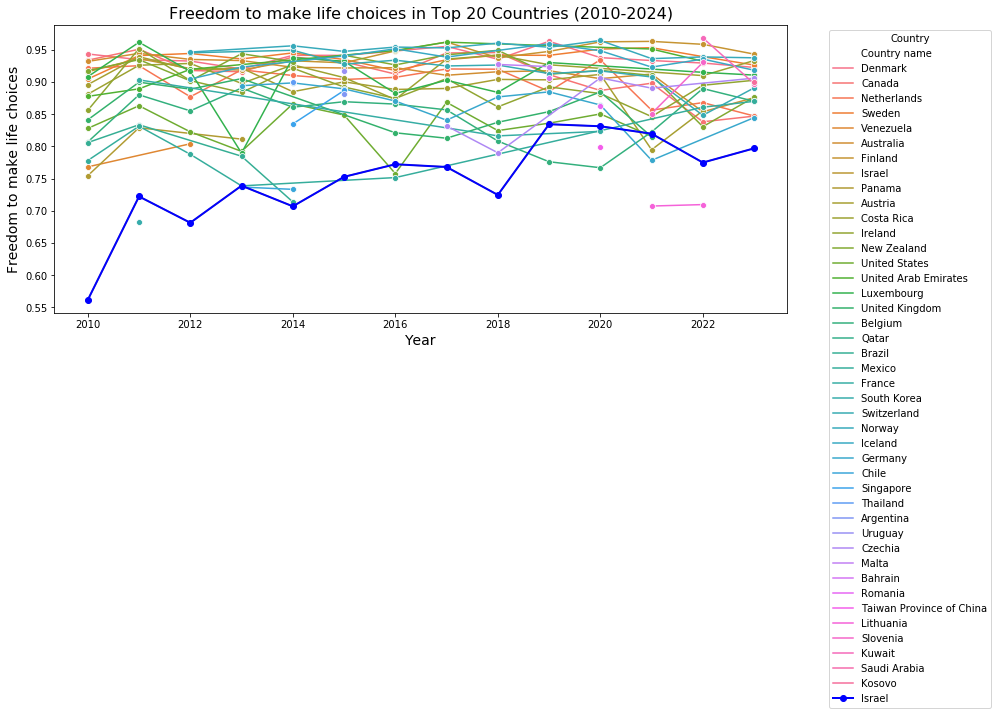

In [19]:
#Freedom to make life choices in the top 20 countries through the years 2010-2024

query = '''
    SELECT "Country name", "year", "Freedom to make life choices"
    FROM (
        SELECT 
            "Country name",
            "year",
            "Freedom to make life choices",
            RANK() OVER (PARTITION BY "year" ORDER BY "Life Ladder" DESC) AS rank
        FROM happy_report
        WHERE year BETWEEN 2010 AND 2024
    ) AS ranked
    WHERE rank <= 21
    ORDER BY "year", rank
'''


top_20_freedom = pd.read_sql(query, con=engine)


israel_data = top_20_freedom[top_20_freedom['Country name'] == 'Israel']

plt.figure(figsize=(14, 8))

sns.lineplot(data=top_20_freedom, x='year', y='Freedom to make life choices', hue='Country name', 
             marker = 'o' )

plt.plot(israel_data['year'], israel_data['Freedom to make life choices'], marker='o', color='blue', 
         linewidth=2, label='Israel')

plt.title('Freedom to make life choices in Top 20 Countries (2010-2024)', fontsize=16)
plt.xlabel('Year', fontsize=14)
plt.ylabel('Freedom to make life choices', fontsize=14)
plt.legend(title='Country', bbox_to_anchor=(1.05, 1), loc='upper left')

plt.tight_layout()
plt.show()

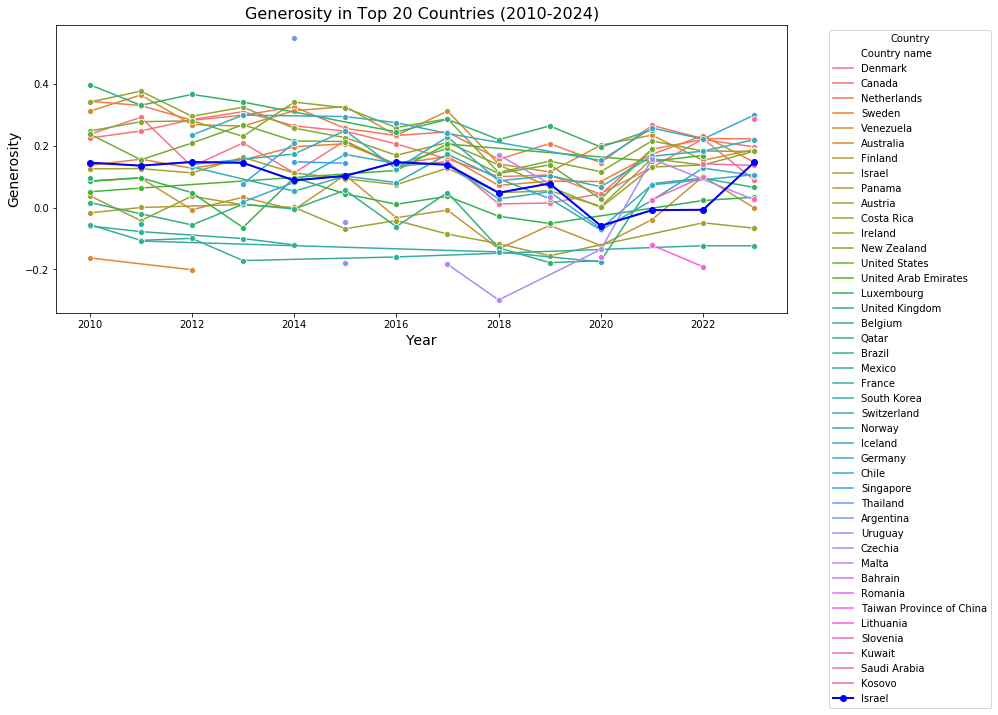

In [20]:
#Generosity in the top 20 countries through the years 2010-2024

query = '''
    SELECT "Country name", "year", "Generosity"
    FROM (
        SELECT 
            "Country name",
            "year",
            "Generosity",
            RANK() OVER (PARTITION BY "year" ORDER BY "Life Ladder" DESC) AS rank
        FROM happy_report
        WHERE year BETWEEN 2010 AND 2024
    ) AS ranked
    WHERE rank <= 21
    ORDER BY "year", rank
'''


top_20_generosity = pd.read_sql(query, con=engine)


israel_data = top_20_generosity[top_20_generosity['Country name'] == 'Israel']

plt.figure(figsize=(14, 8))

sns.lineplot(data=top_20_generosity, x='year', y='Generosity', hue='Country name', 
             marker = 'o' )

plt.plot(israel_data['year'], israel_data['Generosity'], marker='o', color='blue', 
         linewidth=2, label='Israel')

plt.title('Generosity in Top 20 Countries (2010-2024)', fontsize=16)
plt.xlabel('Year', fontsize=14)
plt.ylabel('Generosity', fontsize=14)
plt.legend(title='Country', bbox_to_anchor=(1.05, 1), loc='upper left')

plt.tight_layout()
plt.show()

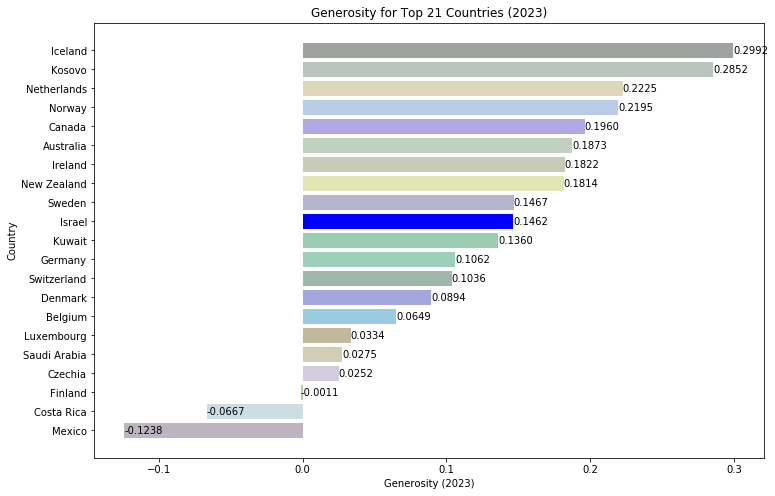

In [21]:
# The average Generosity for each country in the top 20 2023
# Your SQL query and data fetching
query = '''
    SELECT "Country name", "Generosity"
    FROM (
        SELECT 
            "Country name",
            "year",
            "Generosity",
            RANK() OVER (PARTITION BY "year" ORDER BY "Life Ladder" DESC) AS rank
        FROM happy_report
        WHERE year = 2023
    ) AS ranked
    WHERE rank <= 21
    GROUP BY "Country name"
    ORDER BY "Generosity" DESC
    '''
result = pd.read_sql(query, con=engine)
result = result.sort_values(by="Generosity", ascending=False)

colors = [get_country_color(country) for country in result['Country name']]

plt.figure(figsize=(12, 8))
bars = plt.barh(result["Country name"], result["Generosity"], color=colors)

for bar in bars:
    plt.text(bar.get_width(), bar.get_y() + bar.get_height()/2, 
             f'{bar.get_width():.4f}', va='center', ha='left')


plt.xlabel('Generosity (2023)')
plt.ylabel('Country')
plt.title('Generosity for Top 21 Countries (2023)')
plt.gca().invert_yaxis()  
plt.show()


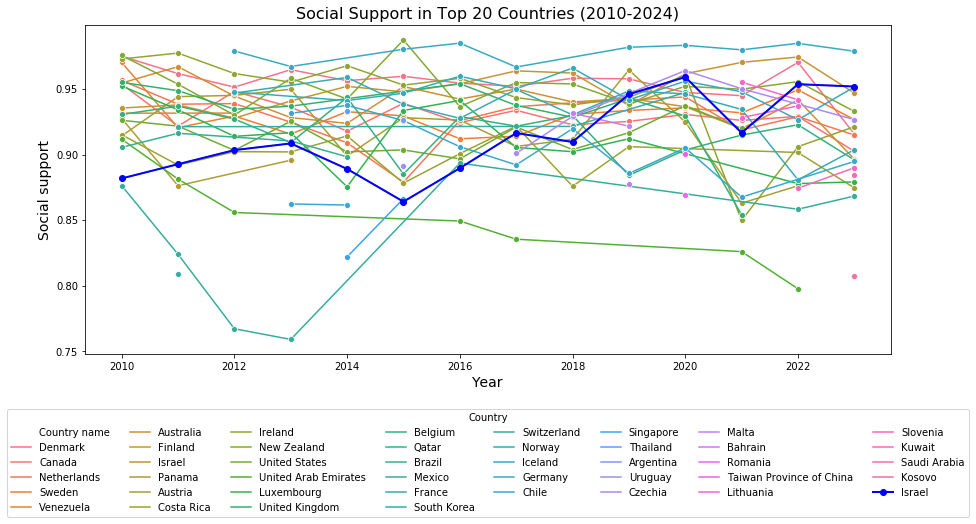

In [22]:
#Generosity in the top 20 countries through the years 2010-2024

query = '''
    SELECT "Country name", "year", "Social support"
    FROM (
        SELECT 
            "Country name",
            "year",
            "Social support",
            RANK() OVER (PARTITION BY "year" ORDER BY "Life Ladder" DESC) AS rank
        FROM happy_report
        WHERE year BETWEEN 2010 AND 2024
    ) AS ranked
    WHERE rank <= 21
    ORDER BY "year", rank
'''


top_20_generosity = pd.read_sql(query, con=engine)


israel_data = top_20_generosity[top_20_generosity['Country name'] == 'Israel']

plt.figure(figsize=(14, 8))

sns.lineplot(data=top_20_generosity, x='year', y='Social support', hue='Country name', 
             marker = 'o' )

plt.plot(israel_data['year'], israel_data['Social support'], marker='o', color='blue', 
         linewidth=2, label='Israel')

plt.title('Social Support in Top 20 Countries (2010-2024)', fontsize=16)
plt.xlabel('Year', fontsize=14)
plt.ylabel('Social support', fontsize=14)
plt.legend(title='Country',  bbox_to_anchor=(0.5, -0.15), loc='upper center', ncol=8)
plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.show()



posx and posy should be finite values
posx and posy should be finite values


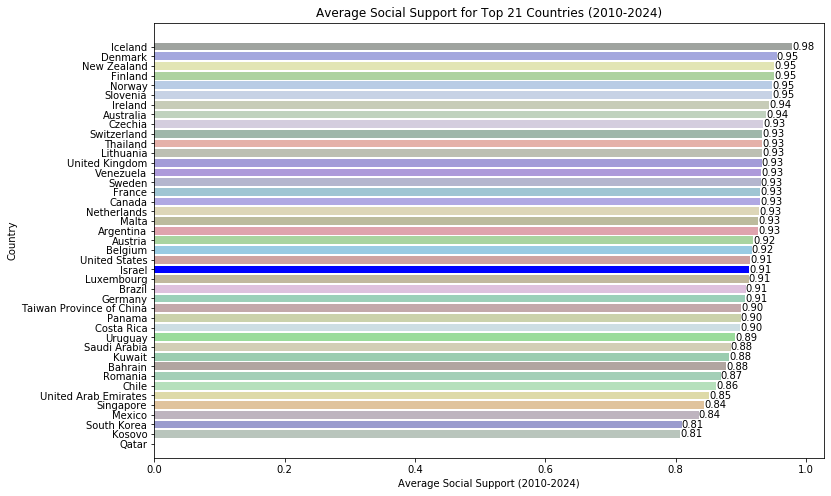

In [23]:
# The average social support for each country in the top 20 between the years 2010-2024 
# SQL query to get the average social support for the top 21 countries
query = '''
    SELECT "Country name", AVG("Social support") AS "Average Social Support"
    FROM (
        SELECT 
            "Country name",
            "year",
            "Social support",
            RANK() OVER (PARTITION BY "year" ORDER BY "Life Ladder" DESC) AS rank
        FROM happy_report
        WHERE year BETWEEN 2010 AND 2024
    ) AS ranked
    WHERE rank <= 21
    GROUP BY "Country name"
    ORDER BY "Average Social Support" DESC
    '''

result = pd.read_sql(query, con=engine)
result = result.sort_values(by="Average Social Support", ascending=False)


colors = [get_country_color(country) for country in result['Country name']]


plt.figure(figsize=(12, 8))
bars = plt.barh(result["Country name"], result["Average Social Support"], color=colors)


for bar in bars:
    plt.text(bar.get_width(), bar.get_y() + bar.get_height()/2, 
             f'{bar.get_width():.2f}', va='center', ha='left')


plt.xlabel('Average Social Support (2010-2024)')
plt.ylabel('Country')
plt.title('Average Social Support for Top 21 Countries (2010-2024)')
plt.gca().invert_yaxis() 
plt.show()


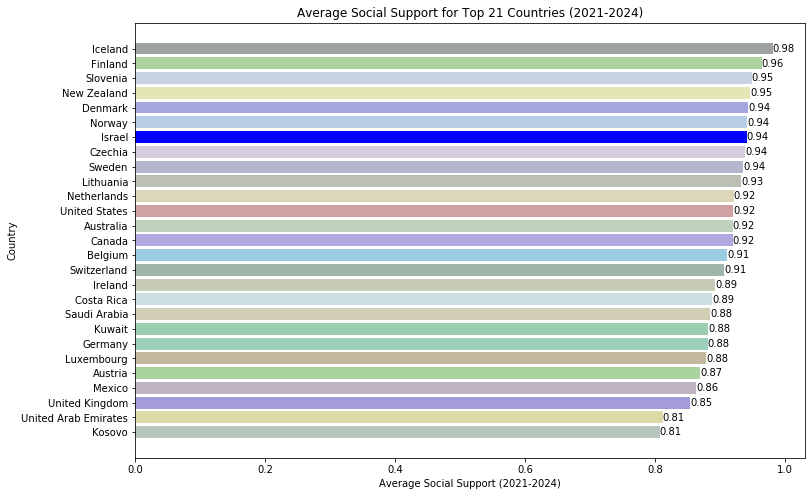

In [24]:
# The average social support for each country in the top 20 between the years 2021-2024 
query = '''
    SELECT "Country name", AVG("Social support") AS "Average Social Support"
    FROM (
        SELECT 
            "Country name",
            "year",
            "Social support",
            RANK() OVER (PARTITION BY "year" ORDER BY "Life Ladder" DESC) AS rank
        FROM happy_report
        WHERE year BETWEEN 2021 AND 2024
    ) AS ranked
    WHERE rank <= 21
    GROUP BY "Country name"
    ORDER BY "Average Social Support" DESC
    '''
result = pd.read_sql(query, con=engine)
result = result.sort_values(by="Average Social Support", ascending=False)


colors = [get_country_color(country) for country in result['Country name']]


plt.figure(figsize=(12, 8))
bars = plt.barh(result["Country name"], result["Average Social Support"], color=colors)


for bar in bars:
    plt.text(bar.get_width(), bar.get_y() + bar.get_height()/2, 
             f'{bar.get_width():.2f}', va='center', ha='left')


plt.xlabel('Average Social Support (2021-2024)')
plt.ylabel('Country')
plt.title('Average Social Support for Top 21 Countries (2021-2024)')
plt.gca().invert_yaxis() 
plt.show()



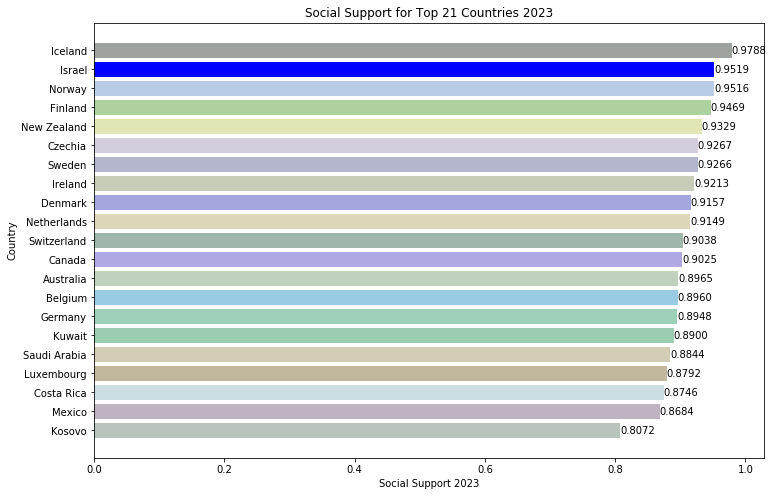

In [25]:
# The average social support for each country in the top 20 2023
query = '''
    SELECT "Country name", "Social support"
    FROM (
        SELECT 
            "Country name",
            "year",
            "Social support",
            RANK() OVER (PARTITION BY "year" ORDER BY "Life Ladder" DESC) AS rank
        FROM happy_report
        WHERE year = 2023
    ) AS ranked
    WHERE rank <= 21
    GROUP BY "Country name"
    ORDER BY "Social support" DESC
    '''
result = pd.read_sql(query, con=engine)
result = result.sort_values(by="Social support", ascending=False)


colors = [get_country_color(country) for country in result['Country name']]


plt.figure(figsize=(12, 8))
bars = plt.barh(result["Country name"], result["Social support"], color=colors)


for bar in bars:
    plt.text(bar.get_width(), bar.get_y() + bar.get_height()/2, 
             f'{bar.get_width():.4f}', va='center', ha='left')


plt.xlabel('Social Support 2023')
plt.ylabel('Country')
plt.title('Social Support for Top 21 Countries 2023')
plt.gca().invert_yaxis() 
plt.show()



In [26]:
# List of countries and years you want to compare
events_countries = {
    "Ukraine": [2014, 2022],
    "Sudan": [2023],
    "Türkiye": [2023],
    "Haiti": [2010],
    "Greece": [2015],
    "Japan": [2011],
    "Nepal": [2015],
    "Syria": [2013],
    "Israel": [2023]  # Israel for 2024
}


conditions = []
for country, years in events_countries.items():
    for year in years:
        conditions.append(f'("Country name" = "{country}" AND year = {year})')

where_clause = " OR ".join(conditions)

query = f'''
    SELECT *
    FROM happy_report
    WHERE {where_clause}
    ORDER BY "Country name", "year"
'''


tragic_event_data = pd.read_sql(query, con=engine)


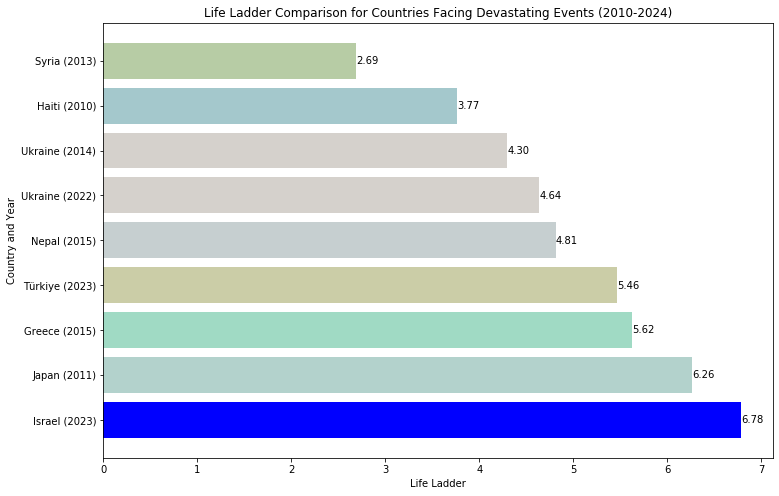

In [27]:
#Life Ladder of countries who experienced devestating events during 2010-2023

tragic_event_data['Country and Year'] = tragic_event_data['Country name'] + ' (' + tragic_event_data['year'].astype(str) + ')'

tragic_event_data = tragic_event_data.sort_values(by="Life Ladder", ascending=True)


colors = [get_country_color(country) for country in tragic_event_data['Country name']]


plt.figure(figsize=(12, 8))

bars = plt.barh(tragic_event_data["Country and Year"], tragic_event_data["Life Ladder"], color=colors)


for bar in bars:
    plt.text(bar.get_width(), bar.get_y() + bar.get_height()/2, 
             f'{bar.get_width():.2f}', va='center', ha='left')


plt.xlabel('Life Ladder')
plt.ylabel('Country and Year')
plt.title('Life Ladder Comparison for Countries Facing Devastating Events (2010-2024)')
plt.gca().invert_yaxis() 


plt.show()


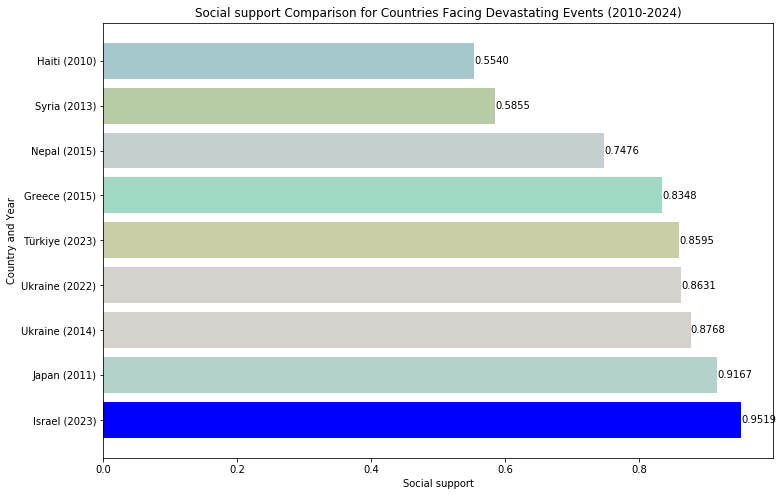

In [28]:
#Social Support of countries who experienced devestating events during 2010-2023
tragic_event_data['Country and Year'] = tragic_event_data['Country name'] + ' (' + tragic_event_data['year'].astype(str) + ')'

tragic_event_data = tragic_event_data.sort_values(by="Social support", ascending=True)

colors = [get_country_color(country) for country in tragic_event_data['Country name']]

plt.figure(figsize=(12, 8))

bars = plt.barh(tragic_event_data["Country and Year"], tragic_event_data["Social support"], color=colors)


for bar in bars:
    plt.text(bar.get_width(), bar.get_y() + bar.get_height()/2, 
             f'{bar.get_width():.4f}', va='center', ha='left')


plt.xlabel('Social support')
plt.ylabel('Country and Year')
plt.title('Social support Comparison for Countries Facing Devastating Events (2010-2024)')
plt.gca().invert_yaxis() 


plt.show()


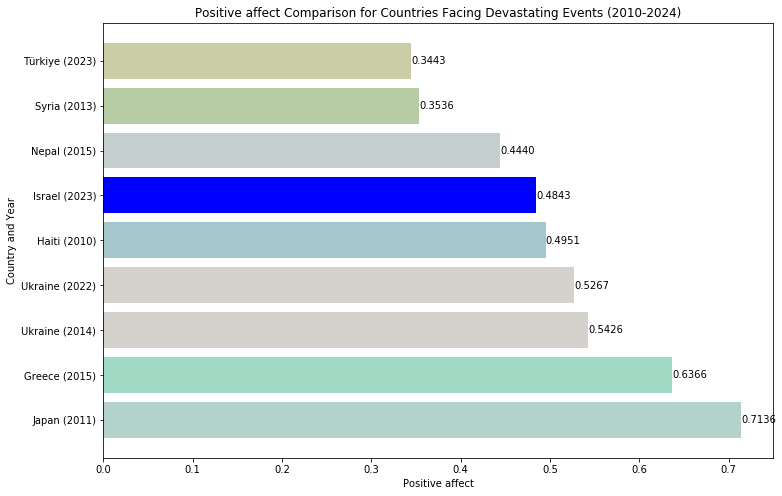

In [29]:
#Positive affect of countries who experienced devestating events during 2010-2023
tragic_event_data['Country and Year'] = tragic_event_data['Country name'] + ' (' + tragic_event_data['year'].astype(str) + ')'

tragic_event_data = tragic_event_data.sort_values(by="Positive affect", ascending=True)

colors = [get_country_color(country) for country in tragic_event_data['Country name']]

plt.figure(figsize=(12, 8))

bars = plt.barh(tragic_event_data["Country and Year"], tragic_event_data["Positive affect"], color=colors)


for bar in bars:
    plt.text(bar.get_width(), bar.get_y() + bar.get_height()/2, 
             f'{bar.get_width():.4f}', va='center', ha='left')


plt.xlabel('Positive affect')
plt.ylabel('Country and Year')
plt.title('Positive affect Comparison for Countries Facing Devastating Events (2010-2024)')
plt.gca().invert_yaxis() 


plt.show()

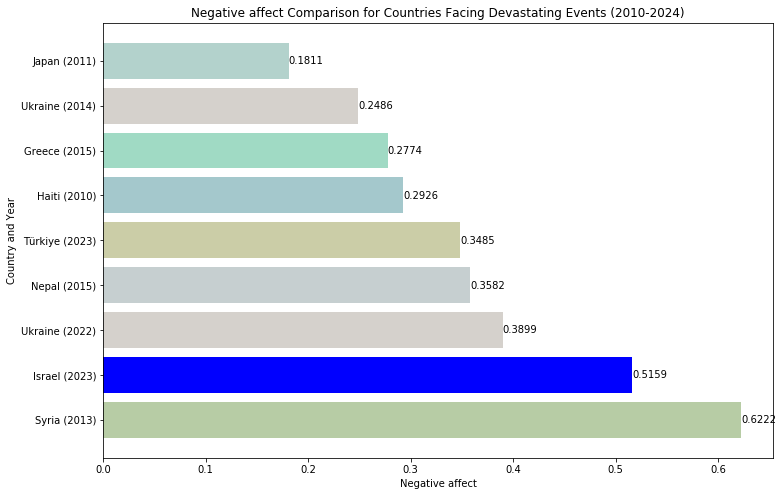

In [30]:
#Negative affect of countries who experienced devestating events during 2010-2023
tragic_event_data['Country and Year'] = tragic_event_data['Country name'] + ' (' + tragic_event_data['year'].astype(str) + ')'

tragic_event_data = tragic_event_data.sort_values(by="Negative affect", ascending=True)

colors = [get_country_color(country) for country in tragic_event_data['Country name']]

plt.figure(figsize=(12, 8))

bars = plt.barh(tragic_event_data["Country and Year"], tragic_event_data["Negative affect"], color=colors)


for bar in bars:
    plt.text(bar.get_width(), bar.get_y() + bar.get_height()/2, 
             f'{bar.get_width():.4f}', va='center', ha='left')


plt.xlabel('Negative affect')
plt.ylabel('Country and Year')
plt.title('Negative affect Comparison for Countries Facing Devastating Events (2010-2024)')
plt.gca().invert_yaxis() 


plt.show()

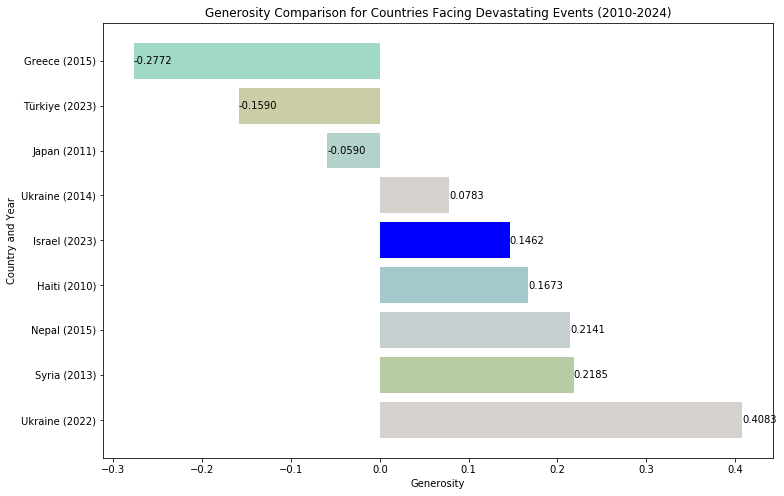

In [31]:
#Generosity of countries who experienced devestating events during 2010-2023
tragic_event_data['Country and Year'] = tragic_event_data['Country name'] + ' (' + tragic_event_data['year'].astype(str) + ')'

tragic_event_data = tragic_event_data.sort_values(by="Generosity", ascending=True)

colors = [get_country_color(country) for country in tragic_event_data['Country name']]

plt.figure(figsize=(12, 8))

bars = plt.barh(tragic_event_data["Country and Year"], tragic_event_data["Generosity"], color=colors)


for bar in bars:
    plt.text(bar.get_width(), bar.get_y() + bar.get_height()/2, 
             f'{bar.get_width():.4f}', va='center', ha='left')


plt.xlabel('Generosity')
plt.ylabel('Country and Year')
plt.title('Generosity Comparison for Countries Facing Devastating Events (2010-2024)')
plt.gca().invert_yaxis() 


plt.show()

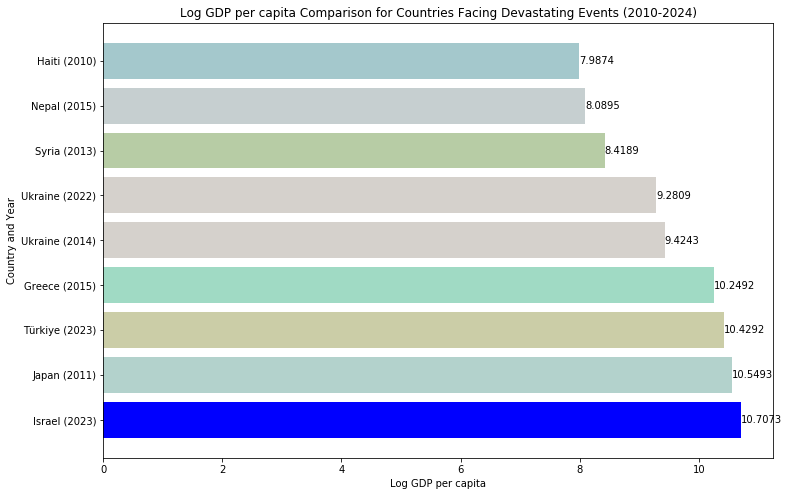

In [32]:
#Log GDP per capita of countries who experienced devestating events during 2010-2023
tragic_event_data['Country and Year'] = tragic_event_data['Country name'] + ' (' + tragic_event_data['year'].astype(str) + ')'

tragic_event_data = tragic_event_data.sort_values(by="Log GDP per capita", ascending=True)

colors = [get_country_color(country) for country in tragic_event_data['Country name']]

plt.figure(figsize=(12, 8))

bars = plt.barh(tragic_event_data["Country and Year"], tragic_event_data["Log GDP per capita"], color=colors)


for bar in bars:
    plt.text(bar.get_width(), bar.get_y() + bar.get_height()/2, 
             f'{bar.get_width():.4f}', va='center', ha='left')


plt.xlabel('Log GDP per capita')
plt.ylabel('Country and Year')
plt.title('Log GDP per capita Comparison for Countries Facing Devastating Events (2010-2024)')
plt.gca().invert_yaxis() 


plt.show()

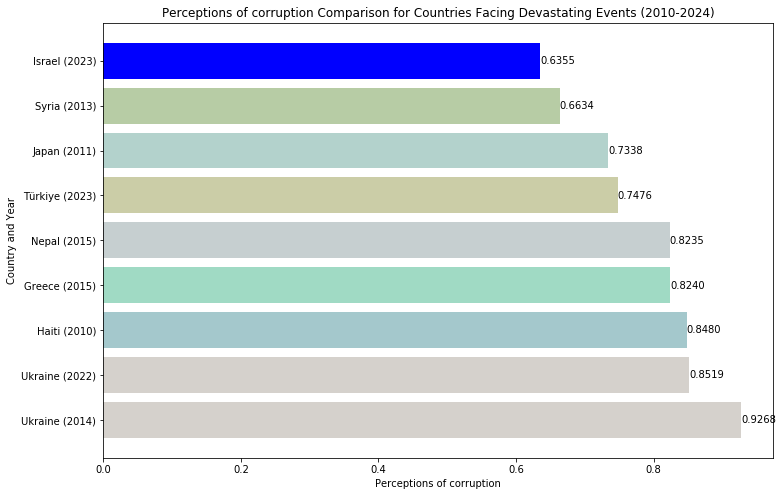

In [33]:
#Perceptions of corruption of countries who experienced devestating events during 2010-2023
tragic_event_data['Country and Year'] = tragic_event_data['Country name'] + ' (' + tragic_event_data['year'].astype(str) + ')'

tragic_event_data = tragic_event_data.sort_values(by="Perceptions of corruption", ascending=True)

colors = [get_country_color(country) for country in tragic_event_data['Country name']]

plt.figure(figsize=(12, 8))

bars = plt.barh(tragic_event_data["Country and Year"], tragic_event_data["Perceptions of corruption"], color=colors)


for bar in bars:
    plt.text(bar.get_width(), bar.get_y() + bar.get_height()/2, 
             f'{bar.get_width():.4f}', va='center', ha='left')


plt.xlabel('Perceptions of corruption')
plt.ylabel('Country and Year')
plt.title('Perceptions of corruption Comparison for Countries Facing Devastating Events (2010-2024)')
plt.gca().invert_yaxis() 


plt.show()

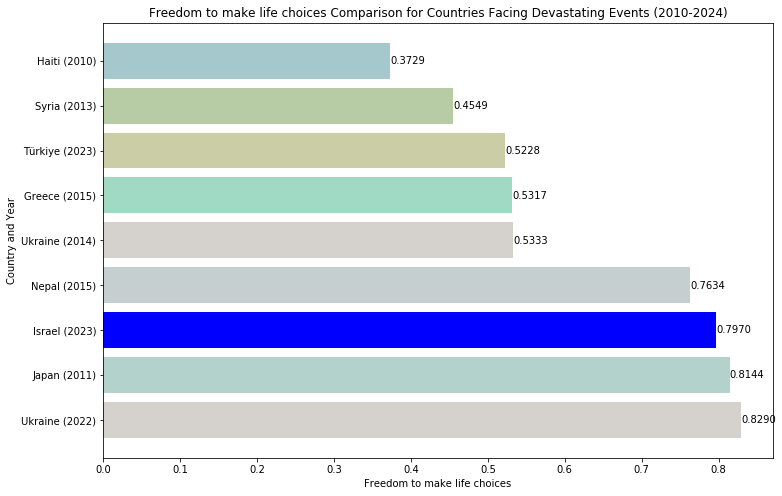

In [34]:
#Freedom to make life choices of countries who experienced devestating events during 2010-2023
tragic_event_data['Country and Year'] = tragic_event_data['Country name'] + ' (' + tragic_event_data['year'].astype(str) + ')'

tragic_event_data = tragic_event_data.sort_values(by="Freedom to make life choices", ascending=True)

colors = [get_country_color(country) for country in tragic_event_data['Country name']]

plt.figure(figsize=(12, 8))

bars = plt.barh(tragic_event_data["Country and Year"], tragic_event_data["Freedom to make life choices"], color=colors)


for bar in bars:
    plt.text(bar.get_width(), bar.get_y() + bar.get_height()/2, 
             f'{bar.get_width():.4f}', va='center', ha='left')


plt.xlabel('Freedom to make life choices')
plt.ylabel('Country and Year')
plt.title('Freedom to make life choices Comparison for Countries Facing Devastating Events (2010-2024)')
plt.gca().invert_yaxis() 


plt.show()

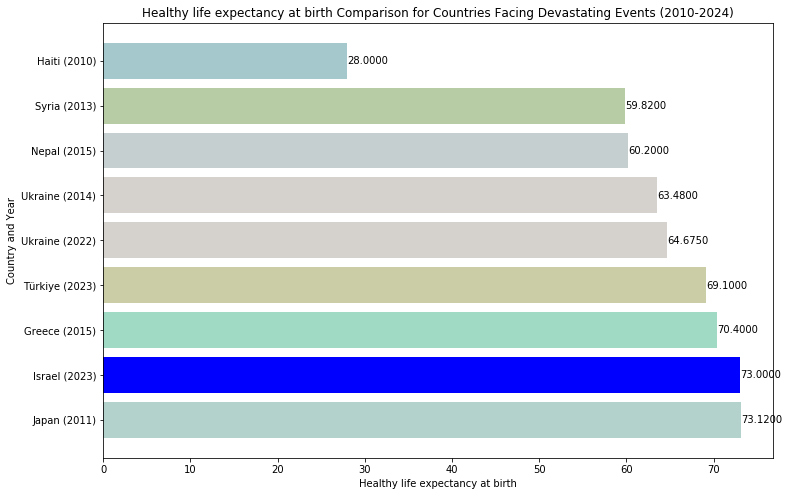

In [35]:
#Healthy life expectancy of countries who experienced devestating events during 2010-2023
tragic_event_data['Country and Year'] = tragic_event_data['Country name'] + ' (' + tragic_event_data['year'].astype(str) + ')'

tragic_event_data = tragic_event_data.sort_values(by="Healthy life expectancy at birth", ascending=True)

colors = [get_country_color(country) for country in tragic_event_data['Country name']]

plt.figure(figsize=(12, 8))

bars = plt.barh(tragic_event_data["Country and Year"], tragic_event_data["Healthy life expectancy at birth"], color=colors)


for bar in bars:
    plt.text(bar.get_width(), bar.get_y() + bar.get_height()/2, 
             f'{bar.get_width():.4f}', va='center', ha='left')


plt.xlabel('Healthy life expectancy at birth')
plt.ylabel('Country and Year')
plt.title('Healthy life expectancy at birth Comparison for Countries Facing Devastating Events (2010-2024)')
plt.gca().invert_yaxis() 


plt.show()